In [1]:
!pip install transformers
!pip install torch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1 torchtext==0.11.0
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 113.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatib

In [2]:
# Run this cell at start for setting proper paths and accessing data from Google Drive
from google.colab import drive
import torch
import os, glob
import sys  

ROOT = '/content/drive' # location mount drive at

def mount_drive(ROOT):
    drive.mount(ROOT, force_remount=True)

mount_drive(ROOT)

new_proj_dir='2020Paper_Reduced_Code'
MODEL_SCRIPTS_DIR = ROOT + f'/MyDrive/{new_proj_dir}/repo/Code' # Location of scripts containing scripts
DATA_SCRIPTS_DIR = ROOT + f'/MyDrive/{new_proj_dir}/repo/Raw_Image_From_CSV' # Location of scripts containing scripts
DATA_DIR = ROOT + f'/MyDrive/{new_proj_dir}/data'
MODEL_DIR = ROOT + f'/MyDrive/{new_proj_dir}/model'
TRAINED_MODELS_DIR = ROOT + f'/MyDrive/{new_proj_dir}/trained_models' # Base directory for all models
sys.path.insert(0, MODEL_SCRIPTS_DIR)
sys.path.insert(0, DATA_SCRIPTS_DIR)

def check_gpu():
    # If there's a GPU available...
    if torch.cuda.is_available():    
        # Tell PyTorch to use the GPU.    
        device = torch.device("cuda")
        print('There are %d GPU(s) available.' % torch.cuda.device_count())
        print('We will use the GPU:', torch.cuda.get_device_name(0))
    # If not...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")

check_gpu()

Mounted at /content/drive
There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [3]:
langArr=["Turkish","Chinese","English"]

In [4]:
import shutil
def create_or_empty(dir_paths):
    for d in dir_paths:
        if not os.path.exists(d):
            os.makedirs(d)

for LANG in langArr:
    create_or_empty([
        MODEL_DIR+ f'/{LANG}',
        DATA_DIR + f'/images_raw/{LANG}/train',
        DATA_DIR + f'/images_raw/{LANG}/val',
        DATA_DIR + f'/images_processed/{LANG}',
        DATA_DIR + f'/{LANG}'
    ])

In [5]:
# utils.py is a python file from repo/Code dir
from utils import create_input_files

for LANG in langArr:
    print(f'\nGenerate Train Set_{LANG}:\n')
    !python "{DATA_SCRIPTS_DIR}/make_dataset_recognition.py" \
    -i "{DATA_DIR}/csv/{LANG}/train.csv" \
    -o "{DATA_DIR}/images_raw/{LANG}/train"

    print(f'\nGenerate Validation Set_{LANG}:\n')
    !python "{DATA_SCRIPTS_DIR}/make_dataset_recognition.py" \
    -i "{DATA_DIR}/csv/{LANG}/val.csv" \
    -o "{DATA_DIR}/images_raw/{LANG}/val"

    print(f'\nGenerating Captions_{LANG}:\n')
    !python "{DATA_SCRIPTS_DIR}/create_caption_labels.py" \
    -tr "{DATA_DIR}/images_raw/{LANG}/train/num_labels.json" \
    -vl "{DATA_DIR}/images_raw/{LANG}/val/num_labels.json" \
    -o "{DATA_DIR}/{LANG}/compiled_training_testing_output.json"
    
    !rm "{DATA_DIR}/images_processed/{LANG}/*"
    create_input_files(
            dataset='coco',
            karpathy_json_path= DATA_DIR + f"/{LANG}/compiled_training_testing_output.json",
            image_folder='NA',
            captions_per_image=1,
            min_word_freq=1,
            output_folder= DATA_DIR + f"/images_processed/{LANG}",
            lang=LANG,
            max_len=50
    )
    # try:
    #     create_input_files(
    #         dataset='coco',
    #         karpathy_json_path= DATA_DIR + f"/{LANG}/compiled_training_testing_output.json",
    #         image_folder='NA',
    #         captions_per_image=1,
    #         min_word_freq=1,
    #         output_folder= DATA_DIR + f"/images_processed/{LANG}",
    #         lang=LANG,
    #         max_len=50
    #     )
    # except Exception as e:
    #     print(e)


Generate Train Set_Turkish:

Loading dataset from /content/drive/MyDrive/2020Paper_Reduced_Code/data/csv/Turkish/train.csv
[['1', 'bir'], ['2', 'iki'], ['3', 'üç'], ['4', 'dört'], ['5', 'beş'], ['6', 'altı'], ['7', 'Yedi'], ['8', 'sekiz'], ['9', 'dokuz'], ['14', 'on dört'], ['15', 'on beş'], ['16', 'on altı'], ['19', 'on dokuz'], ['21', 'yirmi bir'], ['24', 'yirmi dört'], ['30', 'otuz'], ['40', 'kırk'], ['60', 'altmış'], ['70', 'yetmiş'], ['80', 'seksen'], ['105', 'yüz beş'], ['121', 'yüz yirmi bir'], ['124', 'yüz yirmi dört'], ['125', 'yüz yirmi beş'], ['135', 'yüz otuz beş'], ['145', 'Yüz Kırk Beş'], ['205', 'İki yüz beş'], ['221', 'İki yüz yirmi bir'], ['223', 'iki yüz yirmi üç'], ['224', 'İki yüz yirmi dört'], ['225', 'iki yüz yirmi beş'], ['250', 'iki yüz elli'], ['260', 'iki yüz altmış'], ['261', 'İki yüz altmış bir'], ['262', 'İki yüz altmış iki'], ['305', 'Üç yüz beş'], ['321', 'Üç yüz yirmi bir'], ['324', 'üç yüz yirmi dört'], ['350', 'üç yüz elli'], ['402', 'Dört yüz iki'], 

  0%|          | 0/64 [00:00<?, ?it/s]

['bir']


TypeError: ignored

In [ ]:
n_models=50

In [ ]:
for LANG in langArr:
    !python "{MODEL_SCRIPTS_DIR}/train_bootstrap.py" \
    -m "{MODEL_DIR}/default/{LANG}" \
    -d "{DATA_DIR}/images_processed/{LANG}" \
    -n "{n_models}" \
    -b 64 \
    -l default \
    -e 50

Streaming output truncated to the last 5000 lines.
Epochs since last improvement: 46

Epoch: [48/50] Batch: [0/1]	Batch Time 0.310 (0.310)	Data Load Time 0.234 (0.234)	Loss 0.9799 (0.9799)	Top-5 Accuracy 100.000 (100.000)	Lesson: [5/1]
Validation: [0/1]	Batch Time 0.154 (0.154)	Loss 0.9799 (0.9799)	Top-5 Accuracy 100.000 (100.000)	

 * LOSS - 0.980, TOP-5 ACCURACY - 100.000, BLEU-4 - 1.491668146240062e-154


Epochs since last improvement: 47

Epoch: [49/50] Batch: [0/1]	Batch Time 0.386 (0.386)	Data Load Time 0.309 (0.309)	Loss 0.9799 (0.9799)	Top-5 Accuracy 100.000 (100.000)	Lesson: [5/1]
Validation: [0/1]	Batch Time 0.152 (0.152)	Loss 0.9799 (0.9799)	Top-5 Accuracy 100.000 (100.000)	

 * LOSS - 0.980, TOP-5 ACCURACY - 100.000, BLEU-4 - 1.491668146240062e-154


Epochs since last improvement: 48

Epoch: [0/50] Batch: [0/1]	Batch Time 0.310 (0.310)	Data Load Time 0.233 (0.233)	Loss 4.5237 (4.5237)	Top-5 Accuracy 10.156 (10.156)	Lesson: [1/1]
Validation: [0/1]	Batch Time 0.153 (0.153)	Lo

# Epoch wise metrics

In [ ]:
import json
import matplotlib.pyplot as plt
from statistics import mean
import seaborn 

plt.style.use('seaborn')

In [ ]:
dbgPlot=True
def get_avg(metrics):
    """
    Returns average per epoch for all models
    """
    return [mean(mets) for mets in [[metrics[m][e] for m in range(len(metrics))] for e in range(len(metrics[0]))]]

def plot_metric(metric):
    global dbgPlot
    color=['ro-','gx-','b^-']
    for id,LANG in enumerate(langArr):
        metrics_cl = json.load(open(f"{MODEL_DIR}/default/{LANG}/all_metrics_data.json", 'r'))    
        if id==0 and dbgPlot==True:
            metrics_list = list(metrics_cl.keys())
            print(metrics_list,(metrics_cl['training_loss']))
        x = range(0, len(metrics_cl[metric][0]))
        plt.plot(x, get_avg(metrics_cl[metric]),color[id])    
    
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f'{metric} variation vs epochs averaged for {n_models} models')    
    plt.legend(langArr)
    plt.savefig(f'{metric}.png')
    plt.show()

['training_loss', 'top5_training_accuracy', 'validation_loss', 'top5_validation_accuracy', 'bleu_score'] [[4.5033793449401855, 3.5729732513427734, 3.294994354248047, 3.0719690322875977, 2.87443208694458, 2.6588759422302246, 2.4444053173065186, 2.339418888092041, 2.1798741817474365, 2.0627808570861816, 1.9420433044433594, 1.82232666015625, 1.7596044540405273, 1.6443428993225098, 1.5911505222320557, 1.5187461376190186, 1.4327152967453003, 1.376380443572998, 1.3416786193847656, 1.281874179840088, 1.2466583251953125, 1.2413091659545898, 1.219038963317871, 1.1887381076812744, 1.171848177909851, 1.153002142906189, 1.140772819519043, 1.142970323562622, 1.0990395545959473, 1.096392273902893, 1.0948909521102905, 1.089005947113037, 1.0912277698516846, 1.0839935541152954, 1.0690653324127197, 1.0636157989501953, 1.0480084419250488, 1.0554277896881104, 1.0446981191635132, 1.0361912250518799, 1.030008316040039, 1.0219531059265137, 1.0354993343353271, 1.0131734609603882, 1.0057839155197144, 1.0061316

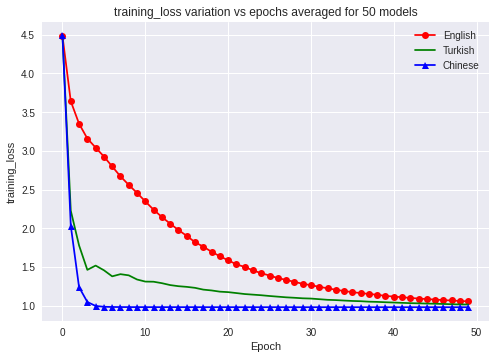

['training_loss', 'top5_training_accuracy', 'validation_loss', 'top5_validation_accuracy', 'bleu_score'] [[4.5033793449401855, 3.5729732513427734, 3.294994354248047, 3.0719690322875977, 2.87443208694458, 2.6588759422302246, 2.4444053173065186, 2.339418888092041, 2.1798741817474365, 2.0627808570861816, 1.9420433044433594, 1.82232666015625, 1.7596044540405273, 1.6443428993225098, 1.5911505222320557, 1.5187461376190186, 1.4327152967453003, 1.376380443572998, 1.3416786193847656, 1.281874179840088, 1.2466583251953125, 1.2413091659545898, 1.219038963317871, 1.1887381076812744, 1.171848177909851, 1.153002142906189, 1.140772819519043, 1.142970323562622, 1.0990395545959473, 1.096392273902893, 1.0948909521102905, 1.089005947113037, 1.0912277698516846, 1.0839935541152954, 1.0690653324127197, 1.0636157989501953, 1.0480084419250488, 1.0554277896881104, 1.0446981191635132, 1.0361912250518799, 1.030008316040039, 1.0219531059265137, 1.0354993343353271, 1.0131734609603882, 1.0057839155197144, 1.0061316

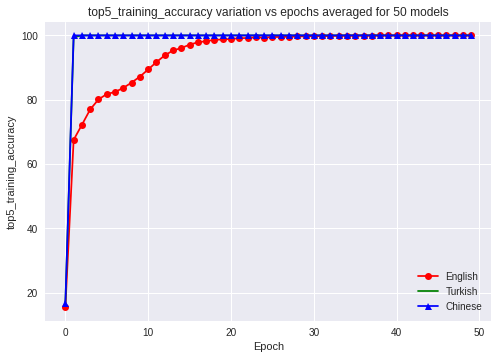

['training_loss', 'top5_training_accuracy', 'validation_loss', 'top5_validation_accuracy', 'bleu_score'] [[4.5033793449401855, 3.5729732513427734, 3.294994354248047, 3.0719690322875977, 2.87443208694458, 2.6588759422302246, 2.4444053173065186, 2.339418888092041, 2.1798741817474365, 2.0627808570861816, 1.9420433044433594, 1.82232666015625, 1.7596044540405273, 1.6443428993225098, 1.5911505222320557, 1.5187461376190186, 1.4327152967453003, 1.376380443572998, 1.3416786193847656, 1.281874179840088, 1.2466583251953125, 1.2413091659545898, 1.219038963317871, 1.1887381076812744, 1.171848177909851, 1.153002142906189, 1.140772819519043, 1.142970323562622, 1.0990395545959473, 1.096392273902893, 1.0948909521102905, 1.089005947113037, 1.0912277698516846, 1.0839935541152954, 1.0690653324127197, 1.0636157989501953, 1.0480084419250488, 1.0554277896881104, 1.0446981191635132, 1.0361912250518799, 1.030008316040039, 1.0219531059265137, 1.0354993343353271, 1.0131734609603882, 1.0057839155197144, 1.0061316

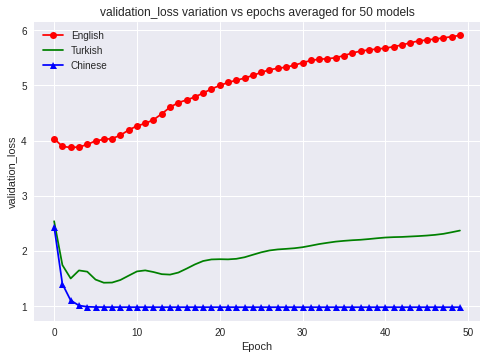

['training_loss', 'top5_training_accuracy', 'validation_loss', 'top5_validation_accuracy', 'bleu_score'] [[4.5033793449401855, 3.5729732513427734, 3.294994354248047, 3.0719690322875977, 2.87443208694458, 2.6588759422302246, 2.4444053173065186, 2.339418888092041, 2.1798741817474365, 2.0627808570861816, 1.9420433044433594, 1.82232666015625, 1.7596044540405273, 1.6443428993225098, 1.5911505222320557, 1.5187461376190186, 1.4327152967453003, 1.376380443572998, 1.3416786193847656, 1.281874179840088, 1.2466583251953125, 1.2413091659545898, 1.219038963317871, 1.1887381076812744, 1.171848177909851, 1.153002142906189, 1.140772819519043, 1.142970323562622, 1.0990395545959473, 1.096392273902893, 1.0948909521102905, 1.089005947113037, 1.0912277698516846, 1.0839935541152954, 1.0690653324127197, 1.0636157989501953, 1.0480084419250488, 1.0554277896881104, 1.0446981191635132, 1.0361912250518799, 1.030008316040039, 1.0219531059265137, 1.0354993343353271, 1.0131734609603882, 1.0057839155197144, 1.0061316

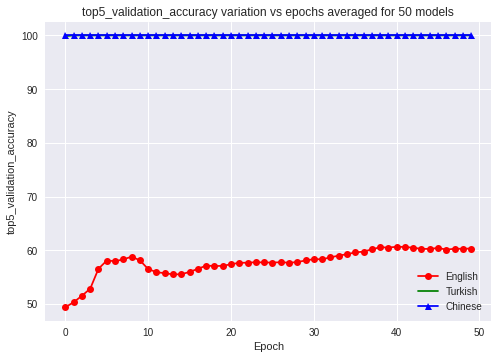

['training_loss', 'top5_training_accuracy', 'validation_loss', 'top5_validation_accuracy', 'bleu_score'] [[4.5033793449401855, 3.5729732513427734, 3.294994354248047, 3.0719690322875977, 2.87443208694458, 2.6588759422302246, 2.4444053173065186, 2.339418888092041, 2.1798741817474365, 2.0627808570861816, 1.9420433044433594, 1.82232666015625, 1.7596044540405273, 1.6443428993225098, 1.5911505222320557, 1.5187461376190186, 1.4327152967453003, 1.376380443572998, 1.3416786193847656, 1.281874179840088, 1.2466583251953125, 1.2413091659545898, 1.219038963317871, 1.1887381076812744, 1.171848177909851, 1.153002142906189, 1.140772819519043, 1.142970323562622, 1.0990395545959473, 1.096392273902893, 1.0948909521102905, 1.089005947113037, 1.0912277698516846, 1.0839935541152954, 1.0690653324127197, 1.0636157989501953, 1.0480084419250488, 1.0554277896881104, 1.0446981191635132, 1.0361912250518799, 1.030008316040039, 1.0219531059265137, 1.0354993343353271, 1.0131734609603882, 1.0057839155197144, 1.0061316

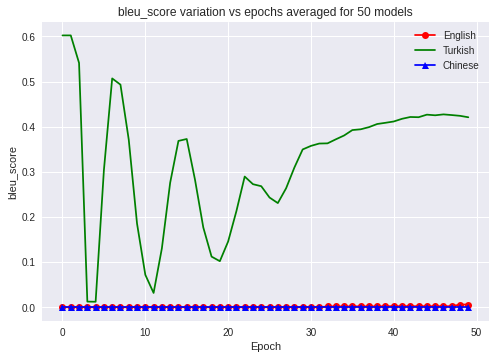

In [ ]:
plot_metric('training_loss')
plot_metric('top5_training_accuracy')
plot_metric('validation_loss')
plot_metric('top5_validation_accuracy')
plot_metric('bleu_score')

!mkdir -p /content/drive/MyDrive/2020Paper_Reduced_Code/data/plots
!mv *.png /content/drive/MyDrive/2020Paper_Reduced_Code/data/plots